# Data Extraction and Analysis of Drone Incident Data

This notebook demonstrates how to extract data from an HTML file containing drone incident data, save it as a CSV file, and analyze the data using Pandas and Matplotlib.

## 1. Import Libraries

We start by importing the necessary libraries.

```python

In [20]:
import csv
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


## 2. Load and Parse HTML File

We will load the HTML file containing the drone incident data and parse it using BeautifulSoup.


In [21]:
with open('drone_data.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'lxml')

table_body = soup.find('div', class_='table-body')


## 3. Extract Data and Save to CSV

If the table body is found, we will extract the relevant data and save it to a CSV file named `table_data.csv`.


In [22]:
if table_body:
    with open('table_data.csv', mode='w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)

        csv_writer.writerow(['Attack / Incident', 'Date', 'Location', 'Sector', 'Type', 'Article Link'])

        
        for row in table_body.find_all('div', class_='table-body-row'):
            row_data = row.find('div', class_='table-body-row-inner')
            if row_data:
                attack_incident = row_data.find_all('div')[0].text.strip()
                date = row_data.find('div', {'data-type': 'date'}).text.strip()
                location = row_data.find_all('div')[2].text.strip()
                sector = row_data.find('div', {'data-type': 'sector'}).text.strip()
                type_ = row_data.find('div', {'data-type': 'type'}).text.strip()
                article_link = row_data.find('a')['href']

                csv_writer.writerow([attack_incident, date, location, sector, type_, article_link])

    print("Data extracted and saved to 'table_data.csv'")
else:
    print("No data was extracted from the table.")


Data extracted and saved to 'table_data.csv'


## 4. Load CSV Data into Pandas

In this section, we will load the extracted CSV data into a Pandas DataFrame for further analysis.


In [23]:
drone = "table_data.csv"
drone_csv = pd.read_csv(drone)
drone_csv.columns


Index(['Attack / Incident', 'Date', 'Location', 'Sector', 'Type',
       'Article Link'],
      dtype='object')

## 5. Data Analysis

In this section, we will perform data analysis on the loaded CSV data.


In [24]:
unique_sectors = drone_csv['Sector'].unique()
unique_types = drone_csv['Type'].unique()

print("Unique Sectors:", unique_sectors)
print("Unique Types:", unique_types)


Unique Sectors: ['Borders' 'Prisons' 'Maritime' 'Community and Neighborhood'
 'Military and Special Forces' 'Critical Facilities and Infrastructure'
 'Local Governmental' 'Airports & Aviation'
 'Law Enforcement Agencies and First Responders' 'Stadiums and Arenas'
 'National Security and Homeland Security' 'VIP Protection'
 'Landmarks and Govt Buildings' 'Media' 'Nature Preservation' 'Enterprise']
Unique Types: ['Smuggling' 'Espionage & ISR' 'Harassment and Nuisance' 'Attack'
 'Collision or Near Collision' 'Privacy']


### Count Occurrences

Next, we will count the occurrences of unique values in the 'Sector' and 'Type' columns.


In [25]:
sector_counts = drone_csv['Sector'].value_counts()
type_counts = drone_csv['Type'].value_counts()

print("Sector Counts:\n", sector_counts)
print("\nType Counts:\n", type_counts)


Sector Counts:
 Sector
Prisons                                          250
Airports & Aviation                              208
Borders                                          174
Law Enforcement Agencies and First Responders    145
Military and Special Forces                      125
Community and Neighborhood                        71
Stadiums and Arenas                               60
Critical Facilities and Infrastructure            39
Landmarks and Govt Buildings                      37
National Security and Homeland Security           30
VIP Protection                                    21
Nature Preservation                               11
Maritime                                           7
Media                                              4
Enterprise                                         2
Local Governmental                                 1
Name: count, dtype: int64

Type Counts:
 Type
Smuggling                      412
Harassment and Nuisance        271
Collision or 

## 6. Visualization

In this section, we will create visualizations to better understand the data distribution.


### Sector Distribution Pie Chart

We will create a pie chart to visualize the distribution of sectors in the drone incident data.


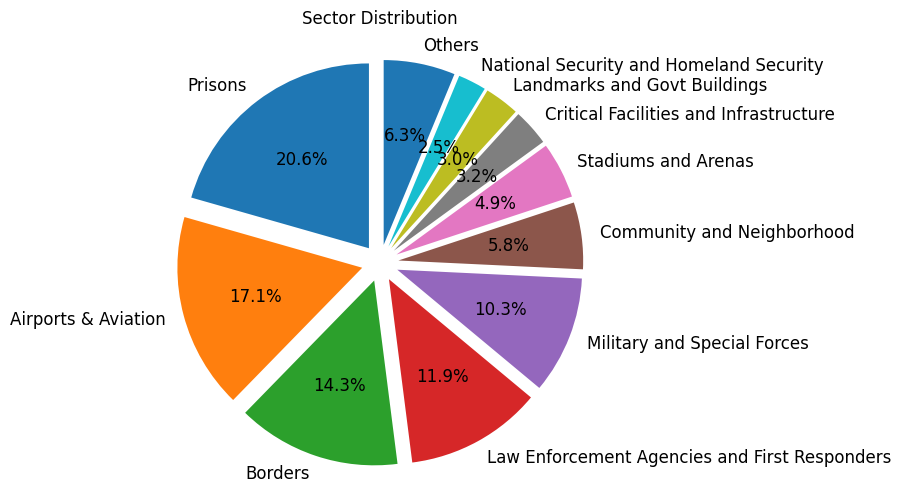

In [26]:
sector_percentage = sector_counts / sector_counts.sum() * 100

filtered_sector_counts = sector_counts[sector_percentage >= 2.5]

other_count = sector_counts[sector_percentage < 3].sum()

others_series = pd.Series([other_count], index=['Others'])
filtered_sector_counts = pd.concat([filtered_sector_counts, others_series])

plt.figure(figsize=(10, 6))

explode = [0.1] * len(filtered_sector_counts)  
filtered_sector_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    title='Sector Distribution', 
    explode=explode, 
    labeldistance=1.1,  
    fontsize=12
)
plt.ylabel('')  

plt.show()


### Type Distribution Pie Chart

We will create another pie chart to visualize the distribution of incident types.


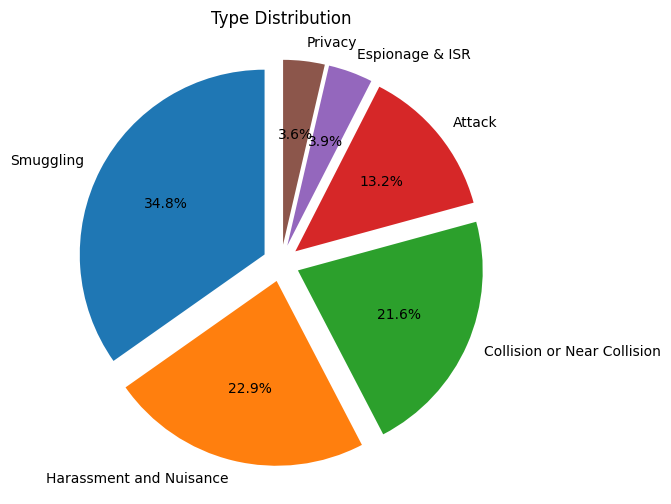

In [27]:
plt.figure(figsize=(10, 6))

explode = [0.1] * len(type_counts)  
type_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    title='Type Distribution',
    explode=explode,
    labeldistance=1.1  
)
plt.ylabel('')  
plt.show()


## Conclusion

In this notebook, we successfully extracted drone incident data from an HTML file, saved it to a CSV format, performed various analyses, and visualized the data distribution. This approach can be adapted for similar data extraction and analysis tasks in the future.
